In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle

from safe_control_gym.lyapunov.lyapunov import GridWorld
from safe_control_gym.lyapunov.utilities import *

# only plot inline
# %matplotlib inline


/home/tumeilsy-mo-10/anaconda3/envs/safe/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dim_grid = 3
grid_constraints = np.array([0.5, 1.5, 1.57, 1.57])
# grid_constraints = np.array([1, 0.3, 0.2])
grid_constraints = np.vstack((-1 * grid_constraints, \
                                    grid_constraints)).T
# grid_constraints_ub = np.array([grid_constraints[0], -0.1, grid_constraints[2]])
# grid_constraints = np.vstack((-1 * grid_constraints, \
#                                     grid_constraints_ub)).T

prec = [11, 31, 31, 31]
# prec = [2, 2, 2]
grids = gridding(dim_grid, grid_constraints, prec)
# print discretized points
print(grids.discrete_points[0])
print(grids.discrete_points[1])
print(grids.discrete_points[2])
print(grids.discrete_points[1][10])

Grid size: 327701
Discretization constant (tau): 0.0
[-0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5]
[-1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2
 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2
  1.3  1.4  1.5]
[-1.57       -1.4653333  -1.3606668  -1.256      -1.1513333  -1.0466667
 -0.94200003 -0.8373334  -0.7326667  -0.628      -0.5233334  -0.4186667
 -0.314      -0.20933335 -0.10466667  0.          0.10466667  0.20933335
  0.314       0.4186667   0.5233334   0.628       0.7326667   0.8373334
  0.94200003  1.0466667   1.1513333   1.256       1.3606668   1.4653333
  1.57      ]
-0.5


In [3]:
m = 0.1
l = 0.5

colors = [None] * 4
colors[0] = 'orange' # small
colors[1] = 'blue' # true
colors[2] = 'cyan' # large

In [4]:
# load M = 0.2 data
M = 0.2
result_file_name =  'results_linear_mpc_M_{:0.1f}_m_{:0.1f}_l_{:0.1f}_prec_{}_{}_{}_{}.json'\
                            .format(M, m, l, prec[0], prec[1], prec[2], prec[3])

# load json data
with open('ROA_data/'+result_file_name, 'r') as f:
    result = json.load(f)

ROA_M_small_data = np.zeros(len(grids.all_points))
for k, result in enumerate(result):
    ROA_M_small_data[result['idx']] = result['goal_reached']


In [5]:
# load M = 0.2 data
M = 1.0
result_file_name =  'results_linear_mpc_M_{:0.1f}_m_{:0.1f}_l_{:0.1f}_prec_{}_{}_{}_{}.json'\
                            .format(M, m, l, prec[0], prec[1], prec[2], prec[3])

# load json data
with open('ROA_data/'+result_file_name, 'r') as f:
    result = json.load(f)

ROA_M_true_data = np.zeros(len(grids.all_points))
for k, result in enumerate(result):
    ROA_M_true_data[result['idx']] = result['goal_reached']


In [6]:
# load M = 1.8 data
M = 1.8
result_file_name =  'results_linear_mpc_M_{:0.1f}_m_{:0.1f}_l_{:0.1f}_prec_{}_{}_{}_{}.json'\
                            .format(M, m, l, prec[0], prec[1], prec[2], prec[3])

# load json data
with open('ROA_data/'+result_file_name, 'r') as f:
    result = json.load(f)

ROA_M_large_data = np.zeros(len(grids.all_points))
for k, result in enumerate(result):
    ROA_M_large_data[result['idx']] = result['goal_reached']

In [7]:
ROA_M_small = ROA_M_small_data.reshape(grids.num_points)
ROA_M_true = ROA_M_true_data.reshape(grids.num_points)
ROA_M_large = ROA_M_large_data.reshape(grids.num_points)

# ROA_M_large.shape
print('ROA_M_true.shape', ROA_M_true.shape)
print('ROA_M_small.shape', ROA_M_small.shape)
print('ROA_M_large.shape', ROA_M_large.shape)

ROA_M_true.shape (11, 31, 31, 31)
ROA_M_small.shape (11, 31, 31, 31)
ROA_M_large.shape (11, 31, 31, 31)


In [34]:
# take a random slice at the snd dimension
# slice_idx = np.random.randint(1, grids.num_points[0])
# ROA_M_large_slice = ROA_M_large[:, slice_idx, :]
# ROA_M_true_slice = ROA_M_true[:, slice_idx, :]
# ROA_M_small_slice = ROA_M_small[:, slice_idx, :]

# slice_idx = np.random.randint(0, grids.num_points[1])
x_slice_idx = 5
theta_slice_idx = 15
print('x_slice_idx: ', x_slice_idx)
print('theta_slice_idx: ', theta_slice_idx)
ROA_M_large_slice = ROA_M_large[x_slice_idx, :, theta_slice_idx, :]
ROA_M_true_slice = ROA_M_true[x_slice_idx, :, theta_slice_idx, :]
ROA_M_small_slice = ROA_M_small[x_slice_idx, :, theta_slice_idx, :]
print('ROA_M_true_slice.shape: ', ROA_M_true_slice.shape)
# print('ROA_M_small_slice: ', ROA_M_small_slice)
# print('ROA_M_true_slice: ', ROA_M_true_slice)
# print('ROA_M_large_slice: ', ROA_M_large_slice)

# get the corresponding x and theta
x_slice_at = grids.discrete_points[0][x_slice_idx]
theta_slice_at = grids.discrete_points[2][theta_slice_idx]
print('x_slice: ', x_slice_at)
print('theta_slice: ', theta_slice_at)

x_slice_idx:  5
theta_slice_idx:  15
ROA_M_true_slice.shape:  (31, 31)
x_slice:  0.0
theta_slice:  0.0


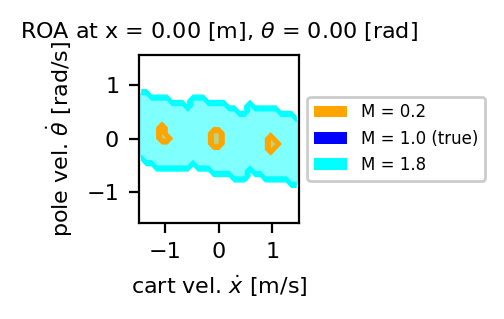

In [35]:
dpi = 200
alpha = .5

fig = plt.figure(figsize=(8, 3), dpi=dpi, frameon=False)
fig.subplots_adjust(wspace=0.35)
ax = plt.subplot(212)
plot_limits = np.concatenate((grid_constraints[1,:], grid_constraints[3,:]))
ax.contour(ROA_M_true_slice.T, origin='lower', extent=plot_limits.ravel(), \
            colors=(colors[1],), linewidths=0.5)
ax.imshow(ROA_M_true_slice.T, origin='lower', extent=plot_limits.ravel(), \
            cmap=binary_cmap(colors[1]), alpha=alpha)
ax.contour(ROA_M_large_slice.T, origin='lower', extent=plot_limits.ravel(), \
            colors=(colors[2],), linewidths=0.5)
ax.imshow(ROA_M_large_slice.T, origin='lower', extent=plot_limits.ravel(), \
            cmap=binary_cmap(colors[2]), alpha=alpha)
ax.contour(ROA_M_small_slice.T, origin='lower', extent=plot_limits.ravel(), \
            colors=(colors[0],), linewidths=0.5)
ax.imshow(ROA_M_small_slice.T, origin='lower', extent=plot_limits.ravel(), \
            cmap=binary_cmap(colors[0]), alpha=alpha)

ax.set_xlabel(r'$\dot{x}$')
ax.set_ylabel(r'$\dot{\theta}$')
# add legend
# set x and y ticks size
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# set x and y title
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# add title
plt.title(r'ROA at x = {:0.2f} [m], $\theta$ = {:0.2f} [rad]'.format(x_slice_at, theta_slice_at), fontsize=8)
proxy = [plt.Rectangle((0,0), 1, 1, fc=c) for c in colors]    
legend = ax.legend(proxy, [r'M = 0.2', r'M = 1.0 (true)', r'M = 1.8'],\
                    ncol=1, fontsize=6, loc='center left', bbox_to_anchor=(1, 0.5),)
legend.get_frame().set_alpha(1.)


In [50]:
# take a random slice at the snd dimension
# slice_idx = np.random.randint(1, grids.num_points[0])
# ROA_M_large_slice = ROA_M_large[:, slice_idx, :]
# ROA_M_true_slice = ROA_M_true[:, slice_idx, :]
# ROA_M_small_slice = ROA_M_small[:, slice_idx, :]

# slice_idx = np.random.randint(0, grids.num_points[1])
x_slice_idx = 6
# theta_slice_idx = 11
print('x_slice_idx: ', x_slice_idx)
# get the corresponding x and theta
x_slice_at = grids.discrete_points[0][x_slice_idx]
# theta_slice_at = grids.discrete_points[2][theta_slice_idx]
print('x_slice: ', x_slice_at)
# print('theta_slice: ', theta_slice_at)

# print('theta_slice_idx: ', theta_slice_idx)
ROA_M_large_3D_slice = ROA_M_large[x_slice_idx, :, :, :]
ROA_M_true_3D_slice = ROA_M_true[x_slice_idx, :, :, :]
ROA_M_small_3D_slice = ROA_M_small[x_slice_idx, :, :, :]
print('ROA_M_large_3D_slice.shape: ', ROA_M_large_3D_slice.shape)
# print('ROA_M_small_3D_slice: ', ROA_M_small_3D_slice)

# get the corresponding points in the slice whose value is 1
ROA_M_large_3D_slice_idx = np.argwhere(ROA_M_large_3D_slice)
ROA_M_true_3D_slice_idx = np.argwhere(ROA_M_true_3D_slice)
ROA_M_small_3D_slice_idx = np.argwhere(ROA_M_small_3D_slice)

print('ROA_M_large_3D_slice_idx.shape: ', ROA_M_large_3D_slice_idx.shape)
# add x_slice_idx to the first dimension
ROA_M_large_3D_slice_idx = np.hstack((x_slice_idx * np.ones((ROA_M_large_3D_slice_idx.shape[0], 1)), ROA_M_large_3D_slice_idx))
ROA_M_true_3D_slice_idx = np.hstack((x_slice_idx * np.ones((ROA_M_true_3D_slice_idx.shape[0], 1)), ROA_M_true_3D_slice_idx))
ROA_M_small_3D_slice_idx = np.hstack((x_slice_idx * np.ones((ROA_M_small_3D_slice_idx.shape[0], 1)), ROA_M_small_3D_slice_idx))
# print('ROA_M_large_3D_slice_idx', ROA_M_large_3D_slice_idx)
# make the index to be integer
ROA_M_large_3D_slice_idx = ROA_M_large_3D_slice_idx.astype(int)
ROA_M_true_3D_slice_idx = ROA_M_true_3D_slice_idx.astype(int)
ROA_M_small_3D_slice_idx = ROA_M_small_3D_slice_idx.astype(int)


# get the corresponding state in the grid
def get_state_from_axis_idx(axis_idx, grids):
    state = []
    for i in range(len(axis_idx)):
        state.append(grids.discrete_points[i][axis_idx[i]])
    state = np.array(state)
    return state

ROA_M_large_3D_slice_state = np.zeros((ROA_M_large_3D_slice_idx.shape[0], 4))
for i in range(ROA_M_large_3D_slice_idx.shape[0]):
    ROA_M_large_3D_slice_state[i, :] = get_state_from_axis_idx(ROA_M_large_3D_slice_idx[i, :], grids)

ROA_M_true_3D_slice_state = np.zeros((ROA_M_true_3D_slice_idx.shape[0], 4))
for i in range(ROA_M_true_3D_slice_idx.shape[0]):
    ROA_M_true_3D_slice_state[i, :] = get_state_from_axis_idx(ROA_M_true_3D_slice_idx[i, :], grids)

ROA_M_small_3D_slice_state = np.zeros((ROA_M_small_3D_slice_idx.shape[0], 4))
for i in range(ROA_M_small_3D_slice_idx.shape[0]):
    ROA_M_small_3D_slice_state[i, :] = get_state_from_axis_idx(ROA_M_small_3D_slice_idx[i, :], grids)
print('ROA_M_large_3D_slice_state.shape: ', ROA_M_large_3D_slice_state.shape)

x_slice_idx:  6
x_slice:  0.1
ROA_M_large_3D_slice.shape:  (31, 31, 31)
ROA_M_large_3D_slice_idx.shape:  (2858, 3)
ROA_M_large_3D_slice_state.shape:  (2858, 4)


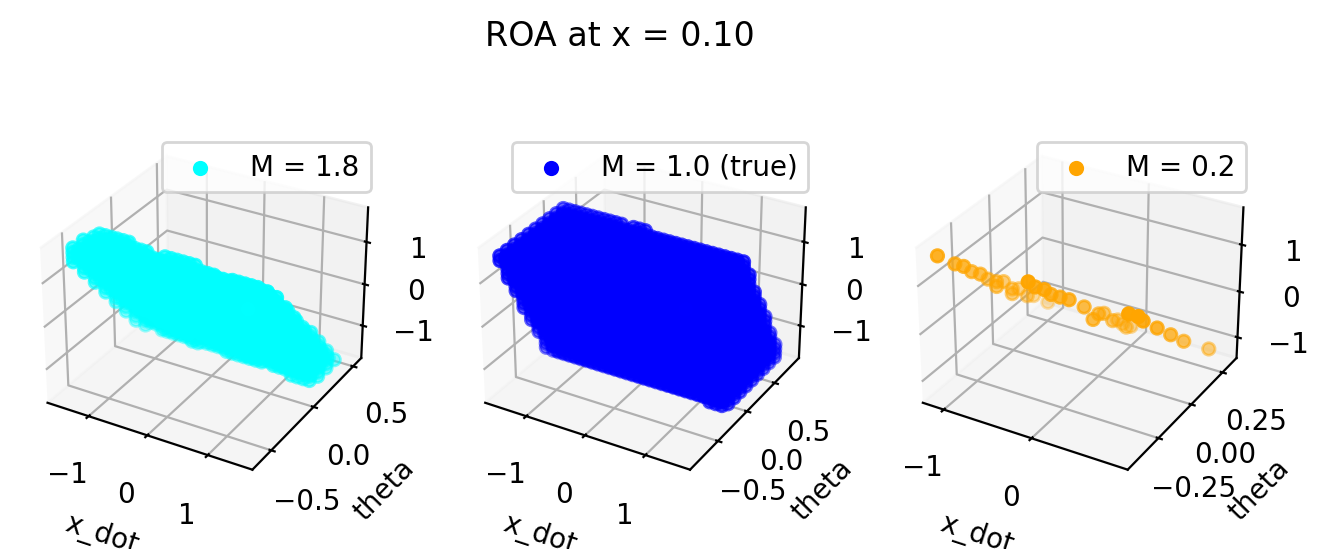

In [51]:
# plot 3D scatter
fig = plt.figure(figsize=(8, 3), dpi=dpi, frameon=False)
ax = plt.subplot(131, projection='3d')
ax.scatter(ROA_M_large_3D_slice_state[:, 1], ROA_M_large_3D_slice_state[:, 2], ROA_M_large_3D_slice_state[:, 3], c=colors[2], marker='o')
ax.set_xlabel('x_dot')
ax.set_ylabel('theta')
ax.set_zlabel('theta_dot')
ax.legend(['M = 1.8'])

ax = plt.subplot(132, projection='3d')
ax.scatter(ROA_M_true_3D_slice_state[:, 1], ROA_M_true_3D_slice_state[:, 2], ROA_M_true_3D_slice_state[:, 3], c=colors[1], marker='o')
ax.set_xlabel('x_dot')
ax.set_ylabel('theta')
ax.set_zlabel('theta_dot')
ax.legend(['M = 1.0 (true)'])

ax = plt.subplot(133, projection='3d')
ax.scatter(ROA_M_small_3D_slice_state[:, 1], ROA_M_small_3D_slice_state[:, 2], ROA_M_small_3D_slice_state[:, 3], c=colors[0], marker='o')
ax.set_xlabel('x_dot')
ax.set_ylabel('theta')
ax.set_zlabel('theta_dot')
ax.legend(['M = 0.2'])

# add title
plt.suptitle('ROA at x = {:0.2f}'.format(x_slice_at))
pickle.dump(fig, open('ROA_data/ROA_3D_slice_x_{:0.2f}.pickle'.format(x_slice_at), 'wb'))

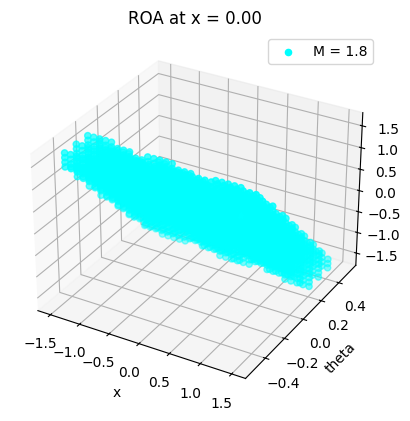

In [13]:
# plot 3D scatter
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax = plt.subplot(131, projection='3d')
ax.scatter(ROA_M_large_3D_slice_state[:, 1], ROA_M_large_3D_slice_state[:, 2], ROA_M_large_3D_slice_state[:, 3], c=colors[2], marker='o')
ax.set_xlabel('x')
ax.set_ylabel('theta')
# ax.set_zlabel('x_dot')
ax.legend(['M = 1.8'])
# add title
plt.title('ROA at x = {:0.2f}'.format(x_slice_at))

pickle.dump(fig, open('ROA_data/ROA_M_large_3D_slice_x_{:0.2f}.pickle'.format(x_slice_at), 'wb'))



# ax = plt.subplot(132, projection='3d')
# ax.scatter(ROA_M_true_3D_slice_state[:, 1], ROA_M_true_3D_slice_state[:, 2], ROA_M_true_3D_slice_state[:, 3], c=colors[1], marker='o')
# ax.set_xlabel('x')
# ax.set_ylabel('theta')
# ax.set_zlabel('x_dot')
# ax.legend(['M = 1.0 (true)'])

# ax = plt.subplot(133, projection='3d')
# ax.scatter(ROA_M_small_3D_slice_state[:, 1], ROA_M_small_3D_slice_state[:, 2], ROA_M_small_3D_slice_state[:, 3], c=colors[0], marker='o')
# ax.set_xlabel('x')
# ax.set_ylabel('theta')
# ax.set_zlabel('x_dot')
# ax.legend(['M = 0.2'])

# add title
# plt.suptitle('ROA at x = {:0.2f}'.format(x_slice_at))


In [14]:
dpi = 100
fig = plt.figure(figsize=(8, 3), dpi=dpi, frameon=False)
fig.subplots_adjust(wspace=0.35)
# plot_limits = [grid_constraints[0], grid_constraints[2]], \
                                # [grid_constraints[0], grid_constraints[2]]
plot_limits = np.concatenate((grid_constraints[0,:], grid_constraints[2,:]))
# grid_constraints[0,:], grid_constraints[2,:]
alpha = 1
colors = [None] * 4
colors[0] = (0, 158/255, 115/255)       # M = 1.8 - green
colors[1] = (230/255, 159/255, 0)       # M = 1.0 - orange
colors[2] = (0, 114/255, 178/255)       # M = 0.2 - blue

# plot ROA on 2d plane with scatter
# get the points that are in the ROA
ROA_M_large_points = grids.all_points[ROA_M_large_data == 1]
ROA_M_true_points = grids.all_points[ROA_M_true_data == 1]
ROA_M_small_points = grids.all_points[ROA_M_small_data == 1]


<Figure size 800x300 with 0 Axes>

Text(0.5, 1.02, 'ROA at $x = 0 \\,[m]$, $\\theta$ = 0.00 [rad]')

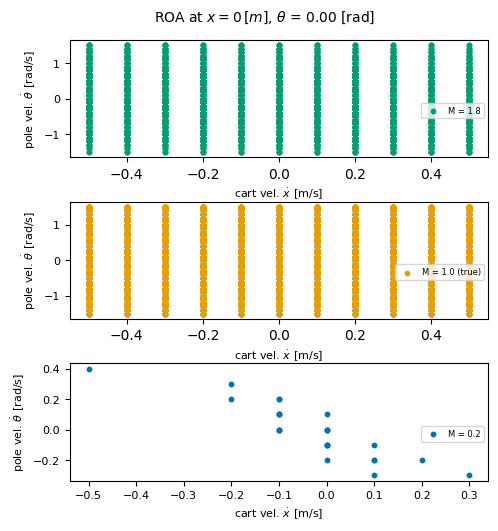

In [15]:
value = 0.
# take the slice of the points
ROA_M_large_points_slice = [i for i in ROA_M_large_points if i[2] == value]
# convert all 3d points to 2d
ROA_M_large_points_slice_2d = np.array([i[0:2] for i in ROA_M_large_points_slice])

ROA_M_true_points_slice = [i for i in ROA_M_true_points if i[2] == value]
ROA_M_true_points_slice_2d = np.array([i[0:2] for i in ROA_M_true_points_slice])

ROA_M_small_points_slice = [i for i in ROA_M_small_points if i[2] == value]
ROA_M_small_points_slice_2d = np.array([i[0:2] for i in ROA_M_small_points_slice])

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5, 5), dpi=dpi, frameon=False)
fig.tight_layout()
# on the first subplot
plt.subplot(311)
plt.scatter(ROA_M_large_points_slice_2d[:,0], ROA_M_large_points_slice_2d[:,1], \
            color=colors[0], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 1.8'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
# set x and y title
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
# plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(312)
plt.scatter(ROA_M_true_points_slice_2d[:,0], ROA_M_true_points_slice_2d[:,1], \
            color=colors[1], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 1.0 (true)'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
# plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(313)
plt.scatter(ROA_M_small_points_slice_2d[:,0], ROA_M_small_points_slice_2d[:,1], \
            color=colors[2], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 0.2'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# set overall title
plt.suptitle(r'ROA at $x = 0 \,[m]$, $\theta$ = {:0.2f} [rad]'.format(value), fontsize=10,
             y=1.02)



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

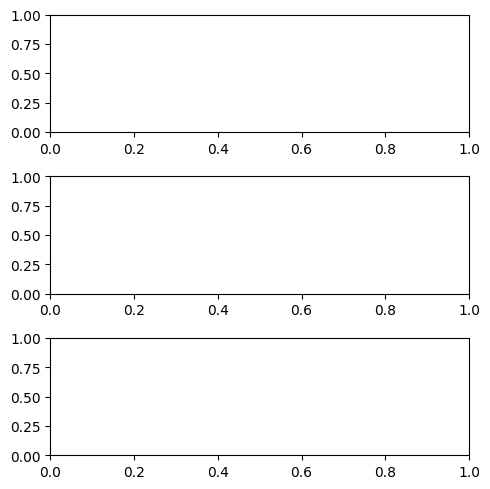

In [16]:
value = grids.discrete_points[1][10]
# take the slice of the points
ROA_M_large_points_slice = [i for i in ROA_M_large_points if i[2] == value]
# convert all 3d points to 2d
ROA_M_large_points_slice_2d = np.array([i[0:2] for i in ROA_M_large_points_slice])

ROA_M_true_points_slice = [i for i in ROA_M_true_points if i[2] == value]
ROA_M_true_points_slice_2d = np.array([i[0:2] for i in ROA_M_true_points_slice])

ROA_M_small_points_slice = [i for i in ROA_M_small_points if i[2] == value]
ROA_M_small_points_slice_2d = np.array([i[0:2] for i in ROA_M_small_points_slice])

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5, 5), dpi=dpi, frameon=False)
fig.tight_layout()
# on the first subplot
plt.subplot(311)
plt.scatter(ROA_M_large_points_slice_2d[:,0], ROA_M_large_points_slice_2d[:,1], \
            color=colors[0], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 1.8'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
# set x and y title
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
# plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(312)
plt.scatter(ROA_M_true_points_slice_2d[:,0], ROA_M_true_points_slice_2d[:,1], \
            color=colors[1], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 1.0 (true)'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
# plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(313)
plt.scatter(ROA_M_small_points_slice_2d[:,0], ROA_M_small_points_slice_2d[:,1], \
            color=colors[2], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 0.2'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# set overall title
plt.suptitle(r'ROA at $x = 0 \,[m]$, $\theta$ = {:0.2f} [rad]'.format(value), fontsize=10,
             y=1.02)

Text(0.5, 1.02, 'ROA at $x = 0 \\,[m]$, $\\theta$ = -2.51 [rad]')

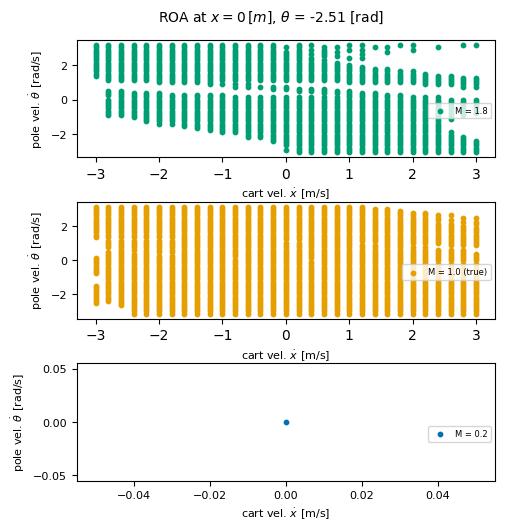

In [ ]:
value = grids.discrete_points[1][5]
# take the slice of the points
ROA_M_large_points_slice = [i for i in ROA_M_large_points if i[2] == value]
# print(ROA_M_large_points)
# convert all 3d points to 2d
ROA_M_large_points_slice_2d = np.array([i[0:2] for i in ROA_M_large_points_slice])

ROA_M_true_points_slice = [i for i in ROA_M_true_points if i[2] == value]
ROA_M_true_points_slice_2d = np.array([i[0:2] for i in ROA_M_true_points_slice])

ROA_M_small_points_slice = [i for i in ROA_M_small_points if i[2] == value]
ROA_M_small_points_slice_2d = np.array([i[0:2] for i in ROA_M_small_points_slice])

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5, 5), dpi=dpi, frameon=False)
fig.tight_layout()
# on the first subplot
plt.subplot(311)
plt.scatter(ROA_M_large_points_slice_2d[:,0], ROA_M_large_points_slice_2d[:,1], \
            color=colors[0], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 1.8'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
# set x and y title
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
# plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(312)
plt.scatter(ROA_M_true_points_slice_2d[:,0], ROA_M_true_points_slice_2d[:,1], \
            color=colors[1], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 1.0 (true)'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
# plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(313)
# plt.scatter(ROA_M_small_points_slice_2d[:,0], ROA_M_small_points_slice_2d[:,1], \
#             color=colors[2], s=10, alpha=alpha)
# plot dummy points
plt.scatter(0, 0, color=colors[2], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 0.2'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# set overall title
plt.suptitle(r'ROA at $x = 0 \,[m]$, $\theta$ = {:0.2f} [rad]'.format(value), fontsize=10,
             y=1.02)

In [ ]:
value = 0.
# take the slice of the points
ROA_M_large_points_slice = [i for i in ROA_M_large_points if i[2] == value]
# convert all 3d points to 2d
ROA_M_large_points_slice_2d = np.array([i[0:2] for i in ROA_M_large_points_slice])

ROA_M_true_points_slice = [i for i in ROA_M_true_points if i[2] == value]
ROA_M_true_points_slice_2d = np.array([i[0:2] for i in ROA_M_true_points_slice])

ROA_M_small_points_slice = [i for i in ROA_M_small_points if i[2] == value]
ROA_M_small_points_slice_2d = np.array([i[0:2] for i in ROA_M_small_points_slice])

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5, 5), dpi=dpi, frameon=False)
fig.tight_layout()
# on the first subplot
plt.subplot(311)
plt.scatter(ROA_M_large_points_slice_2d[:,0], ROA_M_large_points_slice_2d[:,1], \
            color=colors[0], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 1.8'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
# set x and y title
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
# plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(312)
plt.scatter(ROA_M_true_points_slice_2d[:,0], ROA_M_true_points_slice_2d[:,1], \
            color=colors[1], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 1.0 (true)'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
# plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(313)
plt.scatter(ROA_M_small_points_slice_2d[:,0], ROA_M_small_points_slice_2d[:,1], \
            color=colors[2], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 0.2'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# set overall title
plt.suptitle(r'ROA at $x = 0 \,[m]$, $\theta$ = {:0.2f} [rad]'.format(value), fontsize=10,
             y=1.02)

In [ ]:
value = 0.
# take the slice of the points
ROA_M_large_points_slice = [i for i in ROA_M_large_points if i[2] == value]
# convert all 3d points to 2d
ROA_M_large_points_slice_2d = np.array([i[0:2] for i in ROA_M_large_points_slice])

ROA_M_true_points_slice = [i for i in ROA_M_true_points if i[2] == value]
ROA_M_true_points_slice_2d = np.array([i[0:2] for i in ROA_M_true_points_slice])

ROA_M_small_points_slice = [i for i in ROA_M_small_points if i[2] == value]
ROA_M_small_points_slice_2d = np.array([i[0:2] for i in ROA_M_small_points_slice])

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5, 5), dpi=dpi, frameon=False)
fig.tight_layout()
# on the first subplot
plt.subplot(311)
plt.scatter(ROA_M_large_points_slice_2d[:,0], ROA_M_large_points_slice_2d[:,1], \
            color=colors[0], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 1.8'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
# set x and y title
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
# plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(312)
plt.scatter(ROA_M_true_points_slice_2d[:,0], ROA_M_true_points_slice_2d[:,1], \
            color=colors[1], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 1.0 (true)'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
# plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(313)
plt.scatter(ROA_M_small_points_slice_2d[:,0], ROA_M_small_points_slice_2d[:,1], \
            color=colors[2], s=10, alpha=alpha)
ax = plt.gca()
ax.legend([r'M = 0.2'], ncol=1, fontsize=6, loc='upper right', bbox_to_anchor=(1, 0.5),)
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# set overall title
plt.suptitle(r'ROA at $x = 0 \,[m]$, $\theta$ = {:0.2f} [rad]'.format(value), fontsize=10,
             y=1.02)

Text(0.5, 1.0, 'ROA for $M = 1.8$ at x = 0.00 [m], $\\theta$ = 3.14 [rad]')

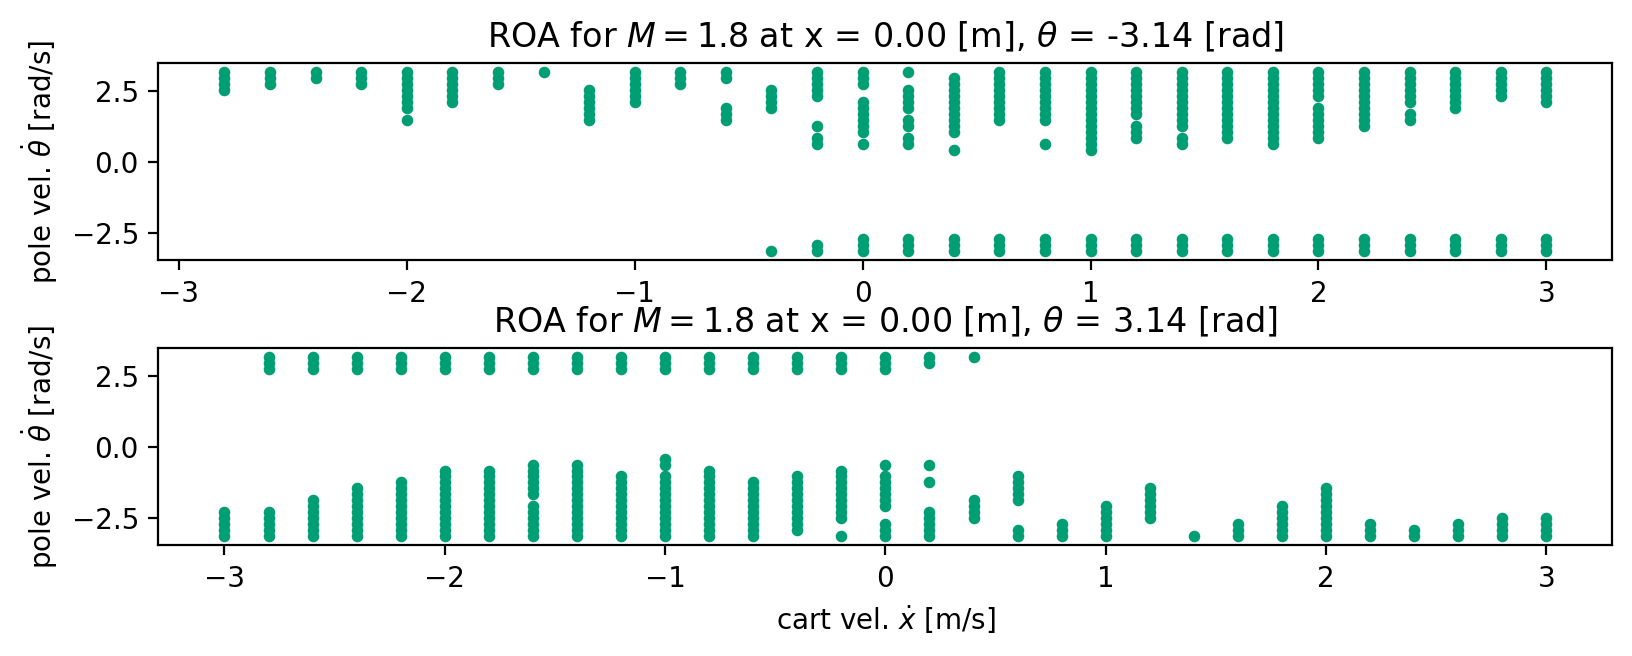

In [ ]:

# get the first value of the second dimension
values_0 = grids.discrete_points[1][0]
values_1 = grids.discrete_points[1][-1]
# take the slice of the points
ROA_M_large_points_slice_0 = [i for i in ROA_M_large_points if i[1] == values_0]
ROA_M_large_points_slice_1 = [i for i in ROA_M_large_points if i[1] == values_1]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 3), dpi=dpi, frameon=False)
fig.tight_layout()
# on the first subplot
plt.subplot(211)
# convert all 3d points to 2d
ROA_M_large_points_slice_2d_0 = np.array([i[0::2] for i in ROA_M_large_points_slice_0])
ROA_M_large_points_slice_2d_1 = np.array([i[0::2] for i in ROA_M_large_points_slice_1])
# plot the points with scatter
plt.scatter(ROA_M_large_points_slice_2d_0[:, 0], ROA_M_large_points_slice_2d_0[:, 1], \
            color=colors[0], alpha=alpha, s=10, label='ROA')
# label the axes
# plt.xlabel(r'cart vel. $\dot{x} $ [m/s]')
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]')
# add title
plt.title(r'ROA for $M = 1.8$ at x = {:0.2f} [m], $\theta$ = {:0.2f} [rad]'.format(0,\
                                         values_0))
# change to the second subplot
plt.subplot(212)

plt.scatter(ROA_M_large_points_slice_2d_1[:, 0], ROA_M_large_points_slice_2d_1[:, 1], \
            color=colors[0], alpha=alpha, s=10)
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]')
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]')
plt.title(r'ROA for $M = 1.8$ at x = {:0.2f} [m], $\theta$ = {:0.2f} [rad]'.format(0,\
                                         values_1))

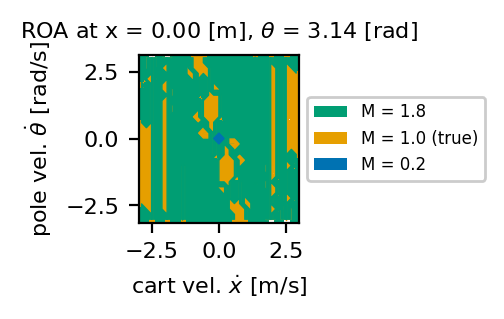

In [ ]:
dpi = 200
alpha = 1
colors = [None] * 4
colors[0] = (0, 158/255, 115/255)       # ROA - bluish-green
colors[1] = (230/255, 159/255, 0)       # NN  - orange
colors[2] = (0, 114/255, 178/255)       # LQR - blue
fig = plt.figure(figsize=(8, 3), dpi=dpi, frameon=False)
fig.subplots_adjust(wspace=0.35)
ax = plt.subplot(212)
plot_limits = np.concatenate((grid_constraints[0,:], grid_constraints[2,:]))
ax.contour(ROA_M_true_slice.T, origin='lower', extent=plot_limits.ravel(), \
            colors=(colors[1],), linewidths=0.5)
ax.imshow(ROA_M_true_slice.T, origin='lower', extent=plot_limits.ravel(), \
            cmap=binary_cmap(colors[1]), alpha=alpha)

ax.contour(ROA_M_large_slice.T, origin='lower', extent=plot_limits.ravel(), \
            colors=(colors[0],), linewidths=0.5)
ax.imshow(ROA_M_large_slice.T, origin='lower', extent=plot_limits.ravel(), \
          cmap=binary_cmap(colors[0]), alpha=alpha)

ax.contour(ROA_M_200_slice.T, origin='lower', extent=plot_limits.ravel(), \
            colors=(colors[2],), linewidths=0.5)
ax.imshow(ROA_M_200_slice.T, origin='lower', extent=plot_limits.ravel(), \
            cmap=binary_cmap(colors[2]), alpha=alpha)
# set x and y ticks size
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# set x and y title
plt.xlabel(r'cart vel. $\dot{x} $ [m/s]', fontsize=8)
plt.ylabel(r'pole vel. $\dot{\theta}$ [rad/s]', fontsize=8)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# add title
plt.title(r'ROA at x = {:0.2f} [m], $\theta$ = {:0.2f} [rad]'.format(0,\
                                         values_1), fontsize=8)
proxy = [plt.Rectangle((0,0), 1, 1, fc=c) for c in colors]    
legend = ax.legend(proxy, [r'M = 1.8', r'M = 1.0 (true)', r'M = 0.2'],\
                    ncol=1, fontsize=6, loc='center left', bbox_to_anchor=(1, 0.5),)
legend.get_frame().set_alpha(1.)
# ax.legend(proxy,  )
# make the legend to be three columns




# ROA_M_large_slice

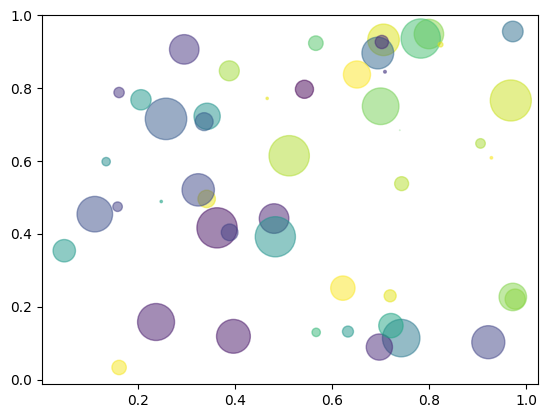

array([0.7003673 , 0.74275081, 0.70928001, 0.56674552, 0.97778533,
       0.70633485, 0.24791576, 0.15788335, 0.69769852, 0.71995667,
       0.25774443, 0.34154678, 0.96876117, 0.6945071 , 0.46638326,
       0.7028127 , 0.51178587, 0.92874137, 0.7397693 , 0.62243903,
       0.65154547, 0.39680761, 0.54323939, 0.79989953, 0.72154473,
       0.29536398, 0.16094588, 0.20612551, 0.13432539, 0.48060502,
       0.34252181, 0.36296929, 0.97291764, 0.11094361, 0.38826409,
       0.78306588, 0.97289726, 0.48320961, 0.33642111, 0.56741904,
       0.04794151, 0.38893703, 0.90630365, 0.16101821, 0.74362113,
       0.63297416, 0.32418002, 0.92237653, 0.23722644, 0.82394557])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()
x